In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to your zip file in Google Drive
zip_path = '/content/drive/My Drive/DLT Project Dataset/Dataset.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/tomato-disease')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/DLT Project Dataset/Dataset.zip'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to the train and validation directories
train_dir = '/content/tomato-disease/tomato/train'
val_dir = '/content/tomato-disease/tomato/val'

# Initialize the ImageDataGenerator for data augmentation and loading
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load the train dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

# Load the validation dataset
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

# Get class indices from the train generator
class_indices = train_generator.class_indices

# Create a list of class labels in the correct order
class_labels = list(class_indices.keys())

# Print the class labels to verify they are in the correct order
print("Class labels in training order: ", class_labels)

# You can now use the `class_labels` variable when making predictions later in your code.


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Class labels in training order:  ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout to avoid overfitting

# Output layer for multi-class classification
model.add(Dense(10, activation='softmax'))  # 10 classes for the 10 diseases

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision()])

# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,038,794 (72.63 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=30  # You can increase/decrease based on performance
)
# Save the model to a file (e.g., 'tomato_disease_model.h5')
model.save('tomato_disease_model.h5')


Epoch 1/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 82s 258ms/step - accuracy: 0.2497 - loss: 2.0671 - precision_1: 0.5474 - val_accuracy: 0.4667 - val_loss: 1.7190 - val_precision_1: 0.5223
Epoch 2/30
  1/312 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.5938 - loss: 1.1485 - precision_1: 0.6500

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5938 - loss: 1.1485 - precision_1: 0.6500 - val_accuracy: 0.3750 - val_loss: 1.2849 - val_precision_1: 0.2857
Epoch 3/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 75s 237ms/step - accuracy: 0.6374 - loss: 1.0323 - precision_1: 0.7609 - val_accuracy: 0.6069 - val_loss: 1.1690 - val_precision_1: 0.6539
Epoch 4/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.7500 - loss: 0.5948 - precision_1: 0.9167 - val_accuracy: 0.6250 - val_loss: 1.7438 - val_precision_1: 0.6250
Epoch 5/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 79s 229ms/step - accuracy: 0.7304 - loss: 0.7710 - precision_1: 0.8073 - val_accuracy: 0.6744 - val_loss: 1.1041 - val_precision_1: 0.7044
Epoch 6/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - accuracy: 0.7500 - loss: 0.5737 - precision_1: 0.8214 - val_accuracy: 0.6250 - val_loss: 1.3939 - val_precision_1: 0.6250
Epoch 7/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 73s 229ms/step - accuracy: 0.7755 - loss: 0.6249 - precision_1: 0.8321 - val_accur

In [ ]:
# Now the class_labels will exactly match the order used during training
print("Class labels in the correct training order: ", class_labels)

Class labels in the correct training order:  ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


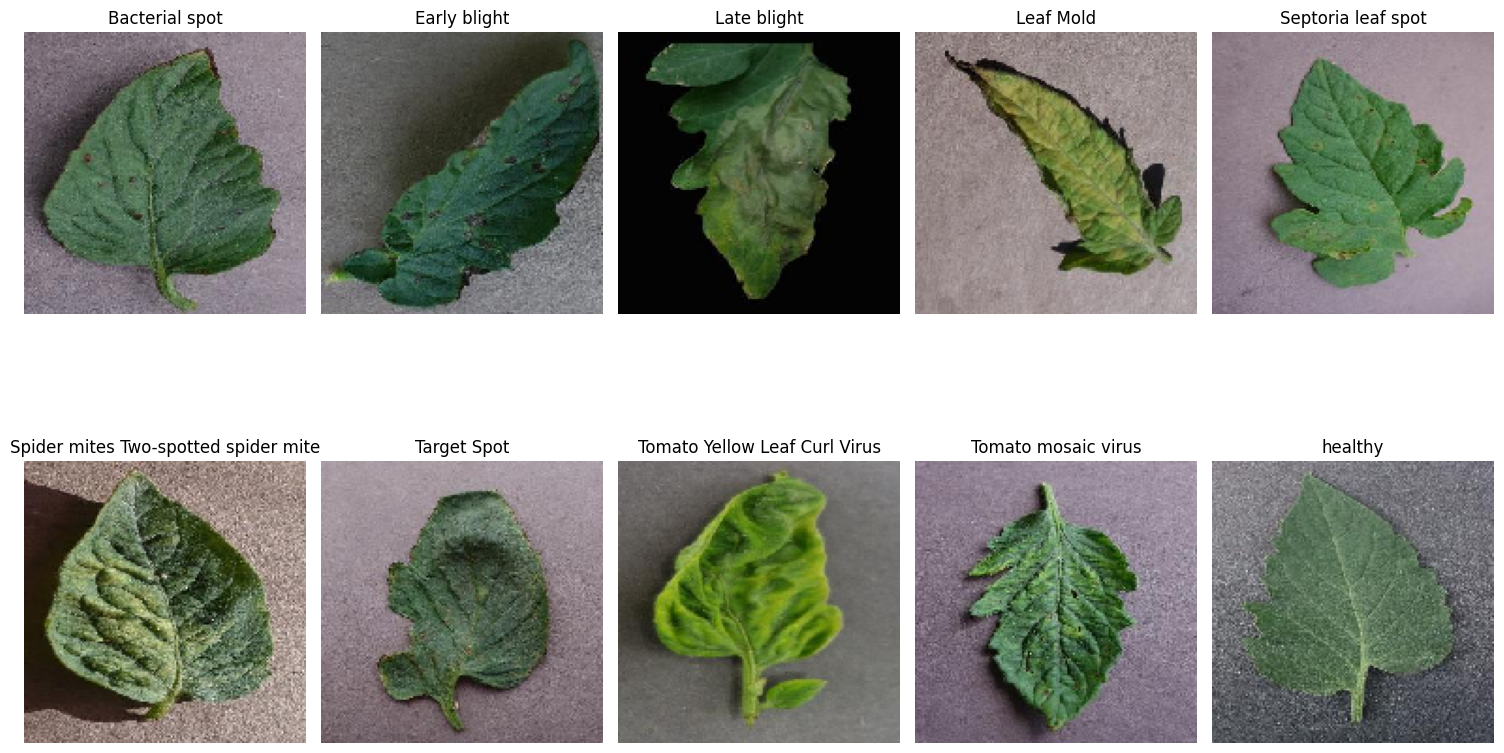

In [ ]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
# Number of classes
num_classes = len(class_labels)

# Initialize a figure for displaying images
plt.figure(figsize=(15, 10))

# Loop through each class and load one image
for i, class_label in enumerate(class_labels):
    class_dir = os.path.join(train_dir, class_label)

    # Get a list of all files in the class directory
    image_files = os.listdir(class_dir)

    # Choose the first image in the directory (or random, you can modify this)
    img_path = os.path.join(class_dir, image_files[10])

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Normalize the image

    # Plot the image in a grid
    plt.subplot(2, (num_classes + 1) // 2, i + 1)  # 2 rows, calculate columns dynamically
    plt.imshow(img_array)
    plt.title(class_label.replace('Tomato___', '').replace('_', ' '))  # Simplify title
    plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

Testing


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('tomato_disease_model.h5')

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize to match input size
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Provide the path to your sample image
img_path = r'/content/tomato-disease/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite/01027422-5838-4aaf-a517-01ea4e2cb6b9___Com.G_SpM_FL 9256.JPG'
# Preprocess the image
img_array = load_and_preprocess_image(img_path)

# Make a prediction
predictions = model.predict(img_array)

# Class labels (ensure this matches the order from training)
class_labels =  ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold',
                  'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
                  'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

# Display top 10 predictions with probabilities
def display_top_predictions(predictions, class_labels):
    top_indices = np.argsort(predictions[0])[::-1][:10]  # Get the indices of the top 10 predictions
    top_probabilities = predictions[0][top_indices]  # Get the probabilities for these predictions
    top_labels = [class_labels[i] for i in top_indices]  # Get the corresponding class labels

    # Display the top 10 predictions
    print("Top 10 Predictions:")
    for i, (label, prob) in enumerate(zip(top_labels, top_probabilities)):
        print(f"{i+1}: {label} - Probability: {prob:.4f}")

# Call the function to display top predictions
display_top_predictions(predictions, class_labels)

# Define a dictionary with pesticide recommendations for each disease
pesticide_recommendations = {
    'Tomato___Bacterial_spot': 'Copper-based fungicides or bactericides like Streptomycin.',
    'Tomato___Early_blight': 'Use fungicides containing chlorothalonil or copper compounds.',
    'Tomato___healthy': 'No pesticide needed; the plant is healthy.',
    'Tomato___Late_blight': 'Apply fungicides like mancozeb or chlorothalonil.',
    'Tomato___Leaf_Mold': 'Use fungicides with mancozeb or copper-based compounds.',
    'Tomato___Septoria_leaf_spot': 'Fungicides containing chlorothalonil or mancozeb are effective.',
    'Tomato___Spider_mites Two-spotted_spider_mite': 'Use miticides or insecticidal soap.',
    'Tomato___Target_Spot': 'Fungicides containing azoxystrobin or mancozeb work well.',
    'Tomato___Tomato_mosaic_virus': 'There is no chemical control for viruses; remove infected plants.',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 'Remove infected plants and control whiteflies with insecticides.'
}

# Get the predicted class index and label
predicted_class_index = np.argmax(predictions[0])
predicted_class_label = class_labels[predicted_class_index]

# Fetch the corresponding pesticide recommendation
pesticide_recommendation = pesticide_recommendations.get(predicted_class_label, "No recommendation available.")

# Output the prediction and pesticide recommendation
print(f'The model predicts the image belongs to class: {predicted_class_label}')
print(f'Recommended pesticide: {pesticide_recommendation}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Top 10 Predictions:
1: Tomato___Target_Spot - Probability: 0.8128
2: Tomato___Spider_mites Two-spotted_spider_mite - Probability: 0.1858
3: Tomato___healthy - Probability: 0.0009
4: Tomato___Early_blight - Probability: 0.0004
5: Tomato___Late_blight - Probability: 0.0000
6: Tomato___Septoria_leaf_spot - Probability: 0.0000
7: Tomato___Leaf_Mold - Probability: 0.0000
8: Tomato___Bacterial_spot - Probability: 0.0000
9: Tomato___Tomato_mosaic_virus - Probability: 0.0000
10: Tomato___Tomato_Yellow_Leaf_Curl_Virus - Probability: 0.0000
The model predicts the image belongs to class: Tomato___Target_Spot
Recommended pesticide: Fungicides containing azoxystrobin or mancozeb work well.


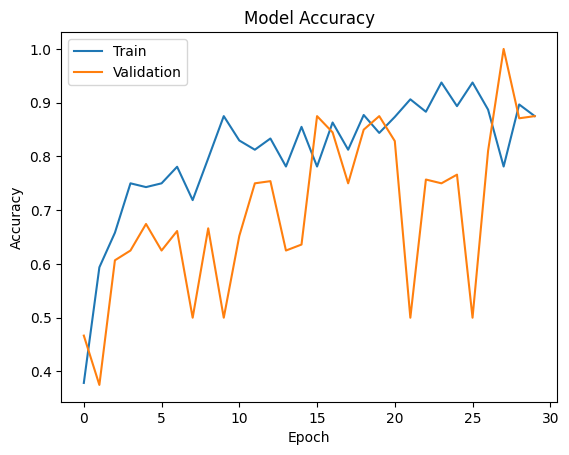

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


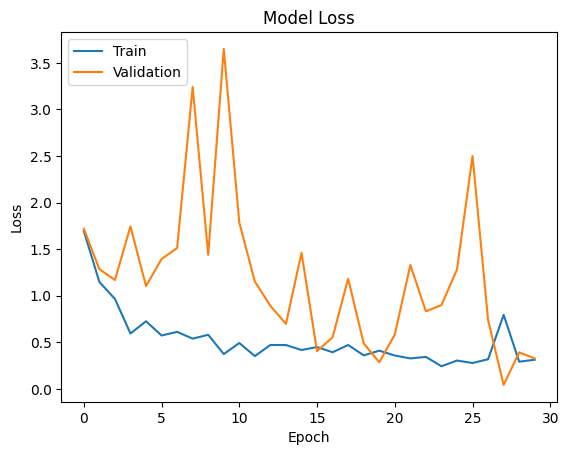

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step


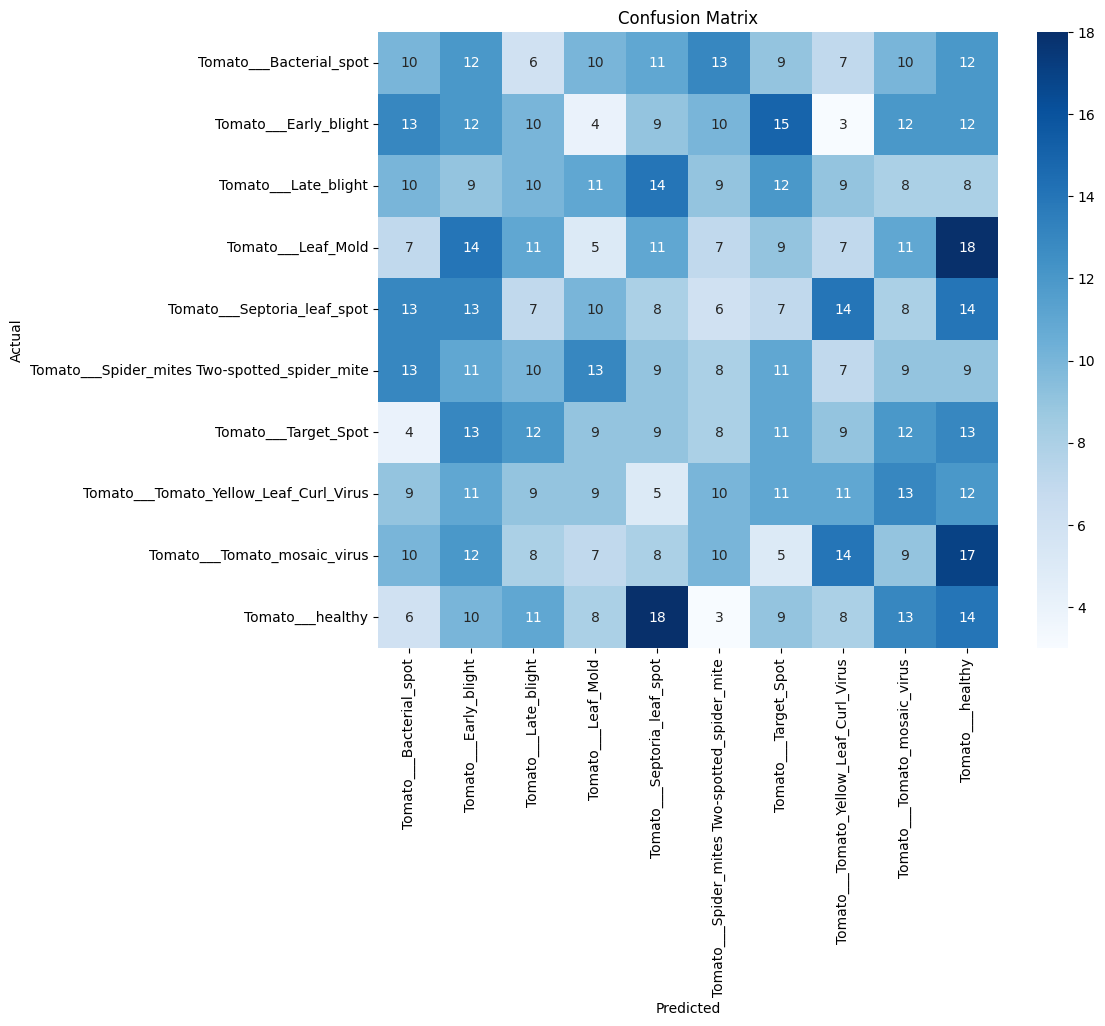

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Assume y_true and y_pred are the true labels and predicted labels respectively
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


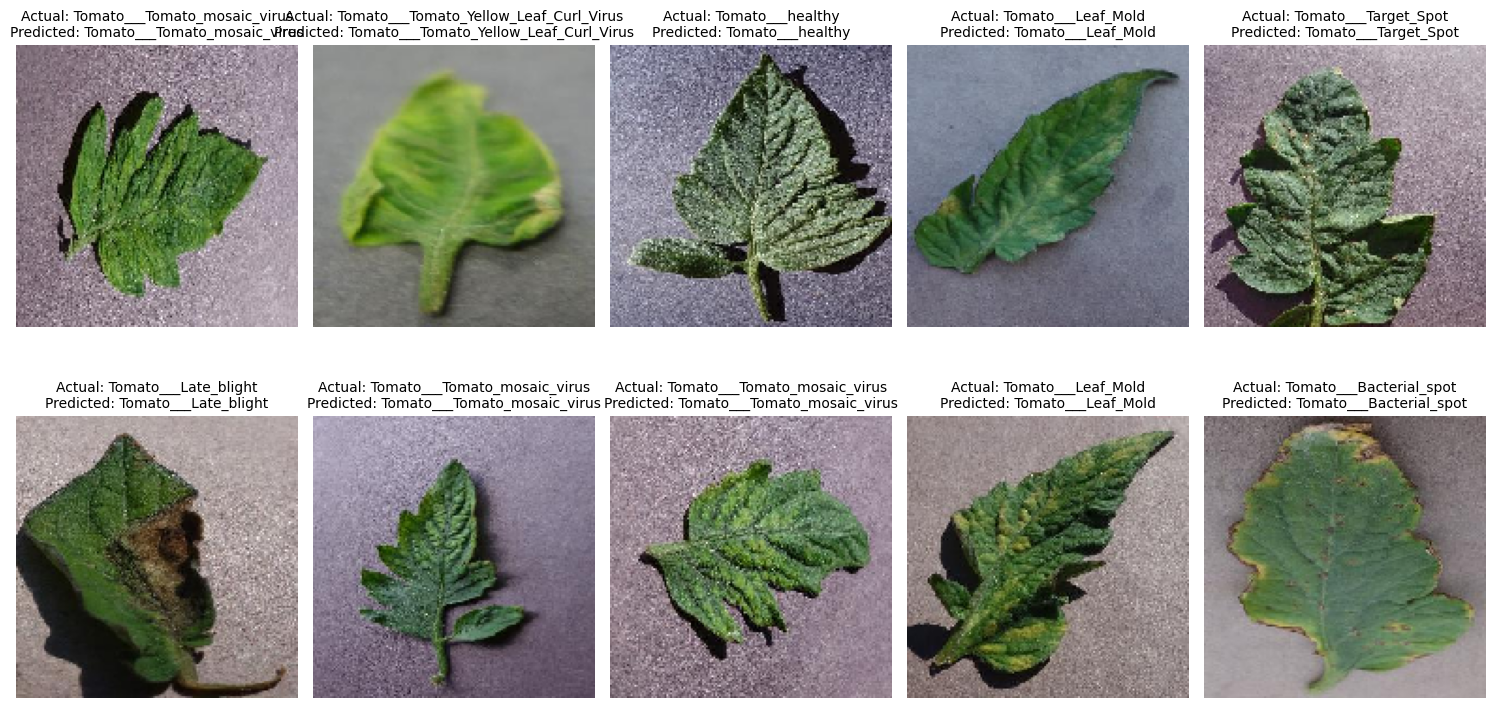

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sample_predictions(generator, model, num_samples=10):
    # Get a batch of images and labels from the generator
    x_batch, y_batch = next(generator)

    # Get model predictions
    predictions = model.predict(x_batch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_batch, axis=1)

    # Calculate the number of columns needed
    num_cols = (num_samples + 1) // 2  # This will ensure two rows
    plt.figure(figsize=(15, 8))  # Adjust size for better display

    for i in range(num_samples):
        plt.subplot(2, num_cols, i + 1)  # Two rows
        plt.imshow(x_batch[i])
        plt.title(f'Actual: {class_labels[true_classes[i]]}\nPredicted: {class_labels[predicted_classes[i]]}', fontsize=10)
        plt.axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Specify how many images you want to plot
plot_sample_predictions(val_generator, model, num_samples=10)  # Change 10 to any number you want
